In [1]:
library(tidyverse)
library(ggplot2)
data <- read_csv("https://github.com/matthewzizek/dsci-100-project/raw/main/data/processed.cleveland.data")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to qu

In [2]:
tibble <- data |>
  select(1, 5) |>
  rename(age = 1, chol = 2)

tibble

age,chol
<dbl>,<dbl>
67,286
67,229
37,250
41,204
56,236
62,268
57,354
63,254
53,203


In [3]:
randomized_data <- data |>
  sample_frac(1)

num_rows <- nrow(randomized_data) / 2

tibble1 <- randomized_data |>
  slice(1:num_rows) |>
  select(1, 5) |>
  rename(age = 1, chol = 2)

tibble2 <- randomized_data |>
  slice((num_rows + 1):(num_rows * 2)) |>
  select(1, 5) |>
  rename(age = 1, chol = 2)

tibble1
tibble2

age,chol
<dbl>,<dbl>
66,246
47,257
49,149
60,230
60,318
60,305
54,266
62,394
70,322


age,chol
<dbl>,<dbl>
55,250
58,284
43,247
60,185
45,234
51,256
55,262
41,198
69,234


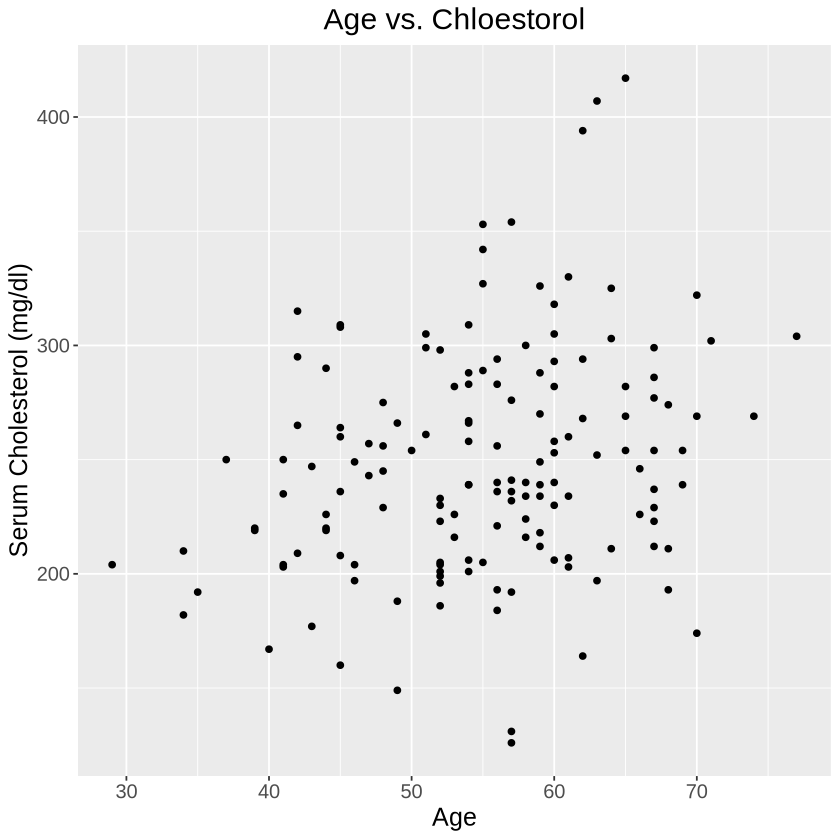

In [4]:
cleveland_splot <- tibble1 |>
                    ggplot(aes(x = age, y = chol)) +
                    geom_point() +
                    labs(x = "Age", y = "Serum Cholesterol (mg/dl)", title = "Age vs. Chloestorol") +
                    theme(text = element_text(size = 15)) +
                    theme(plot.title=element_text(hjust = 0.5))
cleveland_splot

# @phoebe do you think you could make the title more informative like "Cholesterol levels and age of heart diseased patients"

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


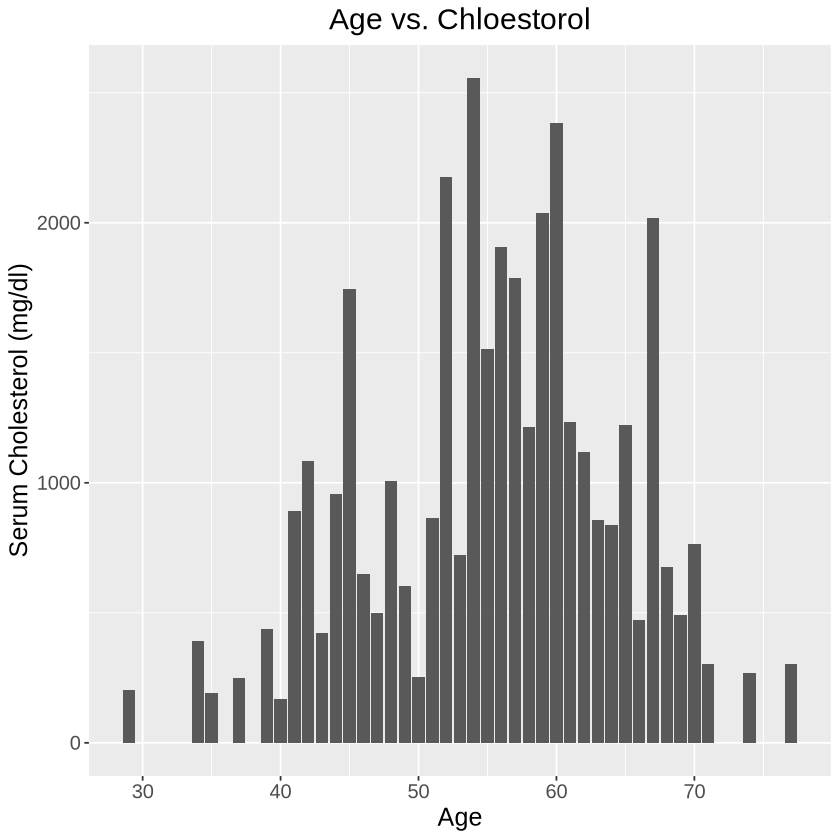

In [6]:
cleveland_histogram <- tibble1 |>
                    ggplot(aes(x = age, y = chol)) +
                    geom_histogram(stat = "identity") +
                    labs(x = "Age", y = "Serum Cholesterol (mg/dl)", title = "Age vs. Chloestorol") +
                    theme(text = element_text(size = 15)) +
                    theme(plot.title=element_text(hjust = 0.5))
cleveland_histogram

## Methods
To conduct our data analysis, we will plot the age of the patients against cholesterol levels using a scatter plot, and then color the data points based on the presence of cardiovascular disease in the patient. Using cholesterol as a predictor, we will then analyze the effect that cholesterol levels have on the development of cardiovascular disease.


## Introduction
Prior research has shown that several risk factors increase the prevalence of heart attacks and heart diseases, including age and high cholesterol levels (above 200 mg/dL). 

Therefore, we will be using data from a valid data set to answer the following predictive question; “Can age and cholesterol levels be used to predict if an individual has a heart disease”. 

The UC Irvine (UCI) Machine Learning Repository contains the Cleveland heart disease dataset that will be used to answer our question. The dataset is used by machine learning researchers to analyze algorithms by answering a variety of predictive questions including predicting heart diseases for patients using many health risk predictors. 